### PET ADOPTION Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import nltk as nlp
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns

In [2]:
df_original = pd.read_csv('C:/Users/saksh/Desktop/train.csv')
df_original.head()

,Type,Age,Gender,Color,Size,FurLength,Vaccinated,Dewormed,Sterilized,Health,Description,PetID,AdoptionSpeed
0,2,3,1,1,1,1,2,2,2,1,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,2
1,2,1,1,1,2,2,3,3,3,1,I just found it alone yesterday near my apartm...,6296e909a,0
2,1,1,1,2,2,2,1,1,2,1,Their pregnant mother was dumped by her irresp...,3422e4906,3
3,1,4,2,1,2,1,1,1,2,1,"Good guard dog, very alert, active, obedience ...",5842f1ff5,2
4,1,1,1,1,2,1,2,2,2,1,This handsome yet cute boy is up for adoption....,850a43f90,2


### Data Preprocessing

In [3]:
df_original.shape

(14993, 13)

In [4]:
df1= df_original.drop_duplicates(subset = 'PetID', inplace = False)
df1.shape

(14993, 13)

In [5]:
df= df_original.drop_duplicates(subset = 'Description', inplace = False)
df.shape

(14002, 13)

In [6]:
#Here, we can see that there are pets with different PetID but same Description. Hence, I removed those entries.

In [7]:
df.isna().sum() #no null values in the dataset except for the Description column

Type             0
Age              0
Gender           0
Color            0
Size             0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Description      1
PetID            0
AdoptionSpeed    0
dtype: int64

In [8]:
#Now we convert the numerical data into text data so that we can create dummy variables

In [9]:
def my_func(row):
    if row['Type']==2:
        val = 'Cat'
    else:
        val = 'Dog'
    return val
df['Type'] = df.apply(my_func, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_15408\1947388988.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df.apply(my_func, axis=1)


In [10]:
def my_func2(row):
    if row['Gender']==2:
        val = 'Female'
    else:
        val = 'Male'
    return val
df['Gender'] = df.apply(my_func2, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_15408\136547245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df.apply(my_func2, axis=1)


In [11]:
def numtotext(row):
    if row.FurLength==1:
        val='Short'
    elif row.FurLength==2:
        val='Medium'
    elif row.FurLength==3:
        val='Long'
    else: val='Not Specified'
    return val
df['FurLength']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_15408\2874342221.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FurLength']=df.apply(numtotext, axis=1)


In [12]:
def numtotext(df):
    if df.Vaccinated==1:
        val='Yes'
    elif df.Vaccinated==2:
        val='No'
    elif df.Vaccinated==3:
        val='Not Sure'
    else: val='Not Specified'
    return val
df['Vaccinated']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_15408\207963058.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vaccinated']=df.apply(numtotext, axis=1)


In [13]:
def numtotext(df):
    if df.Dewormed==1:
        val='Yes'
    elif df.Dewormed==2:
        val='No'
    elif df.Dewormed==3:
        val='Not Sure'
    else: val='Not Specified'
    return val
df['Dewormed']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_15408\35500033.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dewormed']=df.apply(numtotext, axis=1)


In [14]:
def numtotext(df):
    if df.Sterilized==1:
        val='Yes'
    elif df.Sterilized==2:
        val='No'
    elif df.Sterilized==3:
        val='Not Sure'
    else: val='Not Specified'
    return val
df['Sterilized']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_15408\2206426617.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sterilized']=df.apply(numtotext, axis=1)


In [15]:
def numtotext(df):
    if df.Health==1:
        val='Healthy'
    elif df.Health==2:
        val='Minor Injury'
    elif df.Health==3:
        val='Serious Injury'
    else: val='Not Specified'
    return val
df['Health']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_15408\3755023601.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Health']=df.apply(numtotext, axis=1)


In [16]:
def numtotext(df):
    if df.Color==1:
        val='Black'
    elif df.Color==2:
        val='Brown'
    elif df.Color==3:
        val='Golden'
    elif df.Color==4:
        val='Yellow'
    elif df.Color==5:
        val='Cream'
    elif df.Color==6:
        val='Gray'    
    else: val='White'
    return val
df['Color']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_15408\1640194577.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Color']=df.apply(numtotext, axis=1)


In [17]:
def numtotext(df):
    if df.Size==1:
        val='Small'
    elif df.Size==2:
        val='Medium'
    elif df.Size==3:
        val='Large'
    else: val='Not Specified'
    return val
df['Size']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_15408\3165463011.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size']=df.apply(numtotext, axis=1)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14002 entries, 0 to 14992
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           14002 non-null  object
 1   Age            14002 non-null  int64 
 2   Gender         14002 non-null  object
 3   Color          14002 non-null  object
 4   Size           14002 non-null  object
 5   FurLength      14002 non-null  object
 6   Vaccinated     14002 non-null  object
 7   Dewormed       14002 non-null  object
 8   Sterilized     14002 non-null  object
 9   Health         14002 non-null  object
 10  Description    14001 non-null  object
 11  PetID          14002 non-null  object
 12  AdoptionSpeed  14002 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.5+ MB


In [19]:
#Categorizing Adoption Speed into specific classes
#As per the existing dataset, following is the classification:

#Adoption Speed = 0, Adopted within a day
#Adoption Speed = 1, Adopted within a week
#Adoption Speed = 2, Adopted within a month
#Adoption Speed = 3, Adopted within 3 months
#Adoption Speed = 4, Not Adopted in 3 months

#For generating accurate predictions, we will categorize the Adoption Speed as follows:

#Adoption Speed = 0,1,2 -> Adoption Speed = Fast
#Adoption Speed = 3,4 -> Adoption Speed = Slow

In [20]:
#creating a column for categorizing Adoption Speed
df['AdoptionSpeed_categorical'] = df['AdoptionSpeed'] 

C:\Users\saksh\AppData\Local\Temp\ipykernel_15408\3188640627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AdoptionSpeed_categorical'] = df['AdoptionSpeed']


In [21]:
def numtotext(df):
    if df.AdoptionSpeed<=2:
        val='Fast'
    else:
        val='Slow'
    return val
df['AdoptionSpeed_categorical']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_15408\962322626.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AdoptionSpeed_categorical']=df.apply(numtotext, axis=1)


### Predicting Adoption Speed Using Machine Learning

In [26]:
df = df.drop(['AdoptionSpeed'], axis = 1)
df = df.rename({'AdoptionSpeed_categorical' : 'AdoptionSpeed'}, axis = 1)

In [27]:
#Thus, we now have a fairly distributed Age values in the dataset, and now can proceed with building a model
#Since our data is highly categorical, we now create Dummy Variables
numdata=pd.get_dummies(df,columns=['Type','Gender','Color','Size','FurLength','Dewormed','Sterilized','Health','Vaccinated','AdoptionSpeed'])

In [28]:
numdata

,Age,Description,PetID,Type_Cat,Type_Dog,Gender_Female,Gender_Male,Color_Black,Color_Brown,Color_Cream,...,Sterilized_Not Sure,Sterilized_Yes,Health_Healthy,Health_Minor Injury,Health_Serious Injury,Vaccinated_No,Vaccinated_Not Sure,Vaccinated_Yes,AdoptionSpeed_Fast,AdoptionSpeed_Slow
0,3,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,1,I just found it alone yesterday near my apartm...,6296e909a,1,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0
2,1,Their pregnant mother was dumped by her irresp...,3422e4906,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1
3,4,"Good guard dog, very alert, active, obedience ...",5842f1ff5,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
4,1,This handsome yet cute boy is up for adoption....,850a43f90,0,1,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14987,6,ooooo,4d163b731,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
14989,60,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,1,0,0,1,1,0,0,...,0,1,1,0,0,0,0,1,0,1
14990,2,"Mix breed, good temperament kittens. Love huma...",d981b6395,1,0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
14991,9,she is very shy..adventures and independent..s...,e4da1c9e4,1,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,1


In [29]:
numdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14002 entries, 0 to 14992
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    14002 non-null  int64 
 1   Description            14001 non-null  object
 2   PetID                  14002 non-null  object
 3   Type_Cat               14002 non-null  uint8 
 4   Type_Dog               14002 non-null  uint8 
 5   Gender_Female          14002 non-null  uint8 
 6   Gender_Male            14002 non-null  uint8 
 7   Color_Black            14002 non-null  uint8 
 8   Color_Brown            14002 non-null  uint8 
 9   Color_Cream            14002 non-null  uint8 
 10  Color_Golden           14002 non-null  uint8 
 11  Color_Gray             14002 non-null  uint8 
 12  Color_White            14002 non-null  uint8 
 13  Color_Yellow           14002 non-null  uint8 
 14  Size_Large             14002 non-null  uint8 
 15  Size_Medium        

In [30]:
#Now, we drop the irrelevant dummy variables to avoid dummy variable trap
numdata=numdata.drop(['Type_Cat','Gender_Female','Color_Black','Size_Large','FurLength_Long','Dewormed_No','Sterilized_No','Health_Healthy','Vaccinated_No','AdoptionSpeed_Fast'],axis=1)

In [31]:
#Normalizing the Age column to suit the range of other variables

from sklearn.preprocessing import MinMaxScaler

df_new = numdata.copy()
column = 'Age'
df_new[column] = MinMaxScaler().fit_transform(np.array(df_new[column]).reshape(-1,1))
df_new

,Age,Description,PetID,Type_Dog,Gender_Male,Color_Brown,Color_Cream,Color_Golden,Color_Gray,Color_White,...,FurLength_Short,Dewormed_Not Sure,Dewormed_Yes,Sterilized_Not Sure,Sterilized_Yes,Health_Minor Injury,Health_Serious Injury,Vaccinated_Not Sure,Vaccinated_Yes,AdoptionSpeed_Slow
0,0.011765,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.003922,I just found it alone yesterday near my apartm...,6296e909a,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,0.003922,Their pregnant mother was dumped by her irresp...,3422e4906,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,0.015686,"Good guard dog, very alert, active, obedience ...",5842f1ff5,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,0.003922,This handsome yet cute boy is up for adoption....,850a43f90,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14987,0.023529,ooooo,4d163b731,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
14989,0.235294,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
14990,0.007843,"Mix breed, good temperament kittens. Love huma...",d981b6395,0,1,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
14991,0.035294,she is very shy..adventures and independent..s...,e4da1c9e4,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,1


In [32]:
df_new=df_new.iloc[:,:-1]

In [33]:
df_new=df_new.drop(['Description','PetID'], axis=1)

### Feature Elimination 

In [35]:
#Understanding Correlation between independent variables
from scipy import stats
df1=df_new
cormat = df1.corr().abs()
round(cormat,2)

,Age,Type_Dog,Gender_Male,Color_Brown,Color_Cream,Color_Golden,Color_Gray,Color_White,Color_Yellow,Size_Medium,...,FurLength_Medium,FurLength_Short,Dewormed_Not Sure,Dewormed_Yes,Sterilized_Not Sure,Sterilized_Yes,Health_Minor Injury,Health_Serious Injury,Vaccinated_Not Sure,Vaccinated_Yes
Age,1.00,0.16,0.02,0.04,0.05,0.05,0.03,0.05,0.02,0.10,...,0.05,0.12,0.11,0.15,0.09,0.33,0.10,0.04,0.11,0.26
Type_Dog,0.16,1.00,0.08,0.19,0.06,0.09,0.17,0.00,0.13,0.14,...,0.02,0.00,0.08,0.09,0.06,0.07,0.01,0.01,0.08,0.20
Gender_Male,0.02,0.08,1.00,0.06,0.02,0.05,0.01,0.03,0.04,0.05,...,0.01,0.01,0.01,0.09,0.01,0.10,0.01,0.01,0.00,0.08
Color_Brown,0.04,0.19,0.06,1.00,0.14,0.15,0.13,0.12,0.12,0.03,...,0.02,0.03,0.02,0.03,0.01,0.03,0.01,0.01,0.02,0.06
Color_Cream,0.05,0.06,0.02,0.14,1.00,0.07,0.06,0.05,0.05,0.00,...,0.03,0.05,0.02,0.02,0.00,0.03,0.02,0.01,0.02,0.04
Color_Golden,0.05,0.09,0.05,0.15,0.07,1.00,0.06,0.06,0.06,0.02,...,0.02,0.04,0.01,0.02,0.01,0.02,0.00,0.00,0.00,0.01
Color_Gray,0.03,0.17,0.01,0.13,0.06,0.06,1.00,0.05,0.05,0.04,...,0.00,0.01,0.00,0.01,0.01,0.03,0.00,0.01,0.01,0.01
Color_White,0.05,0.00,0.03,0.12,0.05,0.06,0.05,1.00,0.05,0.02,...,0.01,0.03,0.03,0.01,0.03,0.02,0.01,0.01,0.03,0.02
Color_Yellow,0.02,0.13,0.04,0.12,0.05,0.06,0.05,0.05,1.00,0.02,...,0.02,0.01,0.03,0.01,0.00,0.01,0.02,0.00,0.02,0.02
Size_Medium,0.10,0.14,0.05,0.03,0.00,0.02,0.04,0.02,0.02,1.00,...,0.04,0.00,0.03,0.05,0.06,0.01,0.06,0.00,0.05,0.03


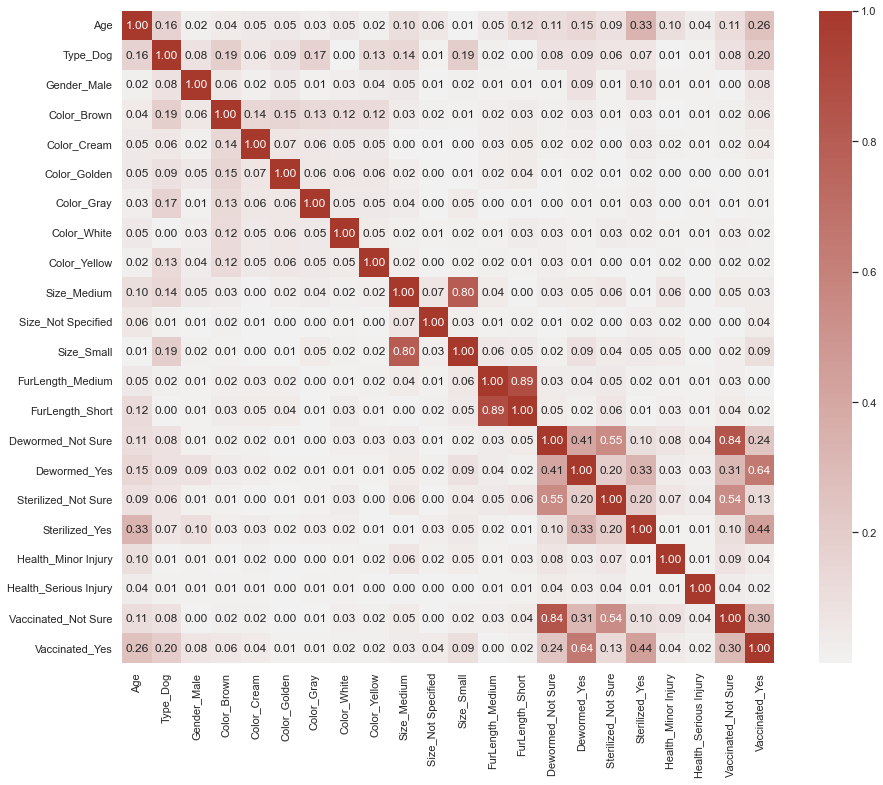

In [40]:
plt.figure(figsize=(16,12))
# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
_ = sns.heatmap(cormat, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)

In [37]:
#Extracting the upper triangle from the correlation matrix
upper_tri = cormat.where(np.triu(np.ones(cormat.shape),k=1).astype(np.bool))
upper_tri

C:\Users\saksh\AppData\Local\Temp\ipykernel_15408\2261826008.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cormat.where(np.triu(np.ones(cormat.shape),k=1).astype(np.bool))


,Age,Type_Dog,Gender_Male,Color_Brown,Color_Cream,Color_Golden,Color_Gray,Color_White,Color_Yellow,Size_Medium,...,FurLength_Medium,FurLength_Short,Dewormed_Not Sure,Dewormed_Yes,Sterilized_Not Sure,Sterilized_Yes,Health_Minor Injury,Health_Serious Injury,Vaccinated_Not Sure,Vaccinated_Yes
Age,NaN,0.16458,0.018196,0.040036,0.048999,0.049859,0.025369,0.049439,0.016435,0.098845,...,0.047002,0.119894,0.110877,0.146052,0.089131,0.331057,0.097197,0.038728,0.111984,0.263931
Type_Dog,NaN,NaN,0.078403,0.186532,0.057864,0.091470,0.171307,0.000841,0.127743,0.143222,...,0.016863,0.000534,0.083114,0.085868,0.064831,0.068440,0.007479,0.008902,0.079183,0.198348
Gender_Male,NaN,NaN,NaN,0.056553,0.018309,0.052982,0.010782,0.025165,0.037573,0.047765,...,0.013524,0.008889,0.009281,0.085477,0.014235,0.103465,0.011436,0.009741,0.004400,0.077311
Color_Brown,NaN,NaN,NaN,NaN,0.141863,0.149171,0.125882,0.123231,0.121055,0.034583,...,0.024561,0.033666,0.019573,0.032358,0.014622,0.031161,0.006009,0.009049,0.019506,0.060723
Color_Cream,NaN,NaN,NaN,NaN,NaN,0.065326,0.055127,0.053966,0.053013,0.002581,...,0.031265,0.046228,0.021623,0.023700,0.000832,0.034509,0.020648,0.012437,0.017386,0.043238
Color_Golden,NaN,NaN,NaN,NaN,NaN,NaN,0.057968,0.056747,0.055744,0.023831,...,0.024243,0.044309,0.006880,0.015445,0.005207,0.016445,0.003975,0.001097,0.003726,0.011035
Color_Gray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047887,0.047041,0.036969,...,0.004299,0.007564,0.000387,0.009933,0.009736,0.028968,0.001040,0.009733,0.005714,0.009842
Color_White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.046051,0.016414,...,0.010162,0.033416,0.026404,0.009119,0.034416,0.024122,0.010464,0.010682,0.028028,0.021939
Color_Yellow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023984,...,0.017402,0.014264,0.028020,0.014749,0.003905,0.006126,0.017901,0.003362,0.017599,0.021324
Size_Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.044892,0.001436,0.034719,0.045583,0.057905,0.006059,0.063093,0.003621,0.045685,0.034144


In [41]:
#With high coorelation between feature 1 and feature 2 we can understand that if we have feature 1 in our dataset, feature 2 won’t 
#bring much new information. That’s why there is no point in keeping feature 2 since it only adds to complexity when training a model.
#Hence, dropping independent variables with high correlation.
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
to_drop

['Size_Small', 'FurLength_Short', 'Vaccinated_Not Sure']

In [42]:
df2=df1.drop(['Size_Small', 'FurLength_Short', 'Vaccinated_Not Sure'],axis=1)

In [43]:
df2

,Age,Type_Dog,Gender_Male,Color_Brown,Color_Cream,Color_Golden,Color_Gray,Color_White,Color_Yellow,Size_Medium,Size_Not Specified,FurLength_Medium,Dewormed_Not Sure,Dewormed_Yes,Sterilized_Not Sure,Sterilized_Yes,Health_Minor Injury,Health_Serious Injury,Vaccinated_Yes
0,0.011765,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.003922,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0
2,0.003922,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1
3,0.015686,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,0.003922,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14987,0.023529,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
14989,0.235294,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1
14990,0.007843,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0
14991,0.035294,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
X = df2
  
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                  feature       VIF
0                     Age  1.690049
1                Type_Dog  2.375321
2             Gender_Male  1.733045
3             Color_Brown  1.460537
4             Color_Cream  1.114606
5            Color_Golden  1.121608
6              Color_Gray  1.091552
7             Color_White  1.079898
8            Color_Yellow  1.079751
9             Size_Medium  2.588866
10     Size_Not Specified  1.011440
11       FurLength_Medium  1.479691
12      Dewormed_Not Sure  1.901536
13           Dewormed_Yes  3.891597
14    Sterilized_Not Sure  1.715525
15         Sterilized_Yes  1.791668
16    Health_Minor Injury  1.052912
17  Health_Serious Injury  1.007309
18         Vaccinated_Yes  3.284356


In [45]:
#In the above result, we observe that once we have removed columns with high collinearity using the correlation matrix,
#none of the values have a high VIF, thus, all the above variables are still to be considered.

In [47]:
import statsmodels.api as sm
X = df2
y = numdata[['AdoptionSpeed_Slow']]

X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)
len(selected_features_BE)

['Age', 'Type_Dog', 'Gender_Male', 'Color_Cream', 'Color_Golden', 'Color_Gray', 'Color_White', 'Size_Medium', 'FurLength_Medium', 'Dewormed_Yes', 'Sterilized_Not Sure', 'Sterilized_Yes', 'Health_Minor Injury', 'Health_Serious Injury', 'Vaccinated_Yes']


15

In [569]:
#Thus, Using backward elimination, we are further able to reduce the independent variables from 19 to 15

In [48]:
df3=df2[['Age', 'Type_Dog', 'Gender_Male', 'Color_Cream', 'Color_Golden', 'Color_Gray', 'Color_White', 'Size_Medium', 'FurLength_Medium', 'Dewormed_Yes', 'Sterilized_Not Sure', 'Sterilized_Yes', 'Health_Minor Injury', 'Health_Serious Injury', 'Vaccinated_Yes']]
x=df3
y=numdata.AdoptionSpeed_Slow

In [49]:
#Now we perform a feature importance test to further reduce the number of independent variables
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
features=x
model.fit(features,numdata['AdoptionSpeed_Slow']) 
feature_importance=pd.DataFrame({'feature':list(features.columns),'feature_importance':[abs(i) for i in model.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)

,feature,feature_importance
13,Health_Serious Injury,0.861664
0,Age,0.773029
11,Sterilized_Yes,0.733777
10,Sterilized_Not Sure,0.518994
6,Color_White,0.402366
3,Color_Cream,0.387498
12,Health_Minor Injury,0.314884
7,Size_Medium,0.274832
4,Color_Golden,0.268551
14,Vaccinated_Yes,0.254955


In [51]:
#We try to eliminate some of the features based on their importance

x=x[['Age','Color_White', 'Color_Cream','Color_Golden', 'Sterilized_Not Sure', 'Sterilized_Yes', 'Health_Serious Injury','Health_Minor Injury','Size_Medium', 'Vaccinated_Yes']]
y=numdata.AdoptionSpeed_Slow

### Applying Machine Learning Models on the Dataset

In [85]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

print("Shape of x Train:", x_train.shape)
print("Shape of y Train:", y_train.shape)
print()
print("Shape of x Test:", x_test.shape)
print("Shape of y Test:", y_test.shape)

Shape of x Train: (11201, 10)
Shape of y Train: (11201,)

Shape of x Test: (2801, 10)
Shape of y Test: (2801,)


#### Model 1 - Logistic Regression

In [76]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test,y_test)

y_pred_LR=model.predict(x_test)

print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.57      0.72      0.64      1389
           1       0.63      0.47      0.54      1412

    accuracy                           0.60      2801
   macro avg       0.60      0.60      0.59      2801
weighted avg       0.60      0.60      0.59      2801



In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Test set accuracy of our logistic regression model is {}%".format(round(accuracy_score(y_pred_LR,y_test)*100,2)))

Test set accuracy of our logistic regression model is 59.66%


#### Model 2 -Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state=42)

classifier.fit(x_train, y_train)
y_pred_RF = classifier.predict(x_test)

from sklearn import metrics
print("Test set accuracy of our Random Forest Classifier model is {}%".format(round(accuracy_score(y_pred_RF,y_test)*100,2)))

Test set accuracy of our Random Forest Classifier model is 59.37%


#### Model 3 -Gaussian Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred_GNB = gnb.predict(x_test)
print("Test set accuracy of our Gaussion Naive Bayes model is {}%".format(round(accuracy_score(y_pred_GNB,y_test)*100,2)))

Test set accuracy of our Gaussion Naive Bayes model is 57.69%


In [84]:
#Therefore, following are the accuracies that we obtain by trying different classification models:

print("Test set accuracy of our logistic regression model is {}%".format(round(accuracy_score(y_pred_LR,y_test)*100,2)))
print("Test set accuracy of our Random Forest Classifier model is {}%".format(round(accuracy_score(y_pred_RF,y_test)*100,2)))
print("Test set accuracy of our Gaussion Naive Bayes model is {}%".format(round(accuracy_score(y_pred_GNB,y_test)*100,2)))

Test set accuracy of our logistic regression model is 59.66%
Test set accuracy of our Random Forest Classifier model is 59.37%
Test set accuracy of our Gaussion Naive Bayes model is 57.69%


In [580]:
#We observe that the highest accuracy is provided by the Logistic Regression Model and the Random Forest Classifier.

In [ ]:
#The attributes that are most relevant for the prediction are: Age, Size, Sterlizied & Health to name a few

In [ ]:
#Few suggestions for Animal Shelters to increase the Adoption Rate are as follows:

#1 - Animals that are currently in the age-group 4-10 should be given more priority for Adoption.
#This is because, the animals younger than age 4 are bound to get adopted without much effort, animals above the age 10
#have fewer chances to get adopted and thus, any extra effort would barely bring in any improvement.

#2 - Animals that are medium in size should be given further priority as small animals are automatically the preferred ones.

#3 - Animals with minor injury can be cared for on priority as animals who are perfectly healthy are faster to get adopted.
#Minor Injuries are likely to be overcome quickly and this would help them be categorized as healthy soon.

#4 - Adoption Centers should take extra steps to ensure the animals are sterilized, so it can improve adoption chances.